In [159]:
import pandas as pd
import numpy as np
import warnings

In [160]:
warnings.filterwarnings('ignore')

In [161]:
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [162]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [163]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [164]:
import seaborn as sns

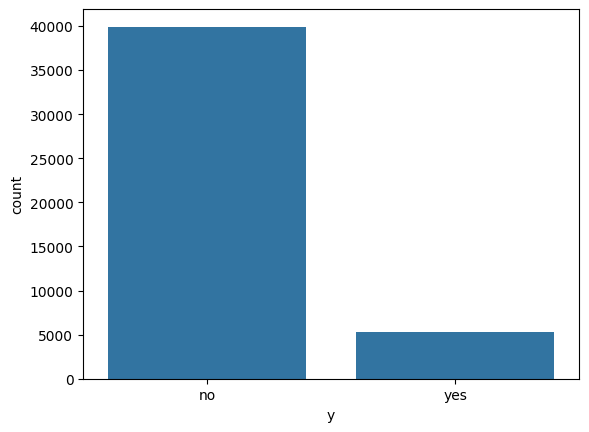

In [165]:
sns.countplot(data=df, x='y');

In [166]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [167]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [168]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [169]:
enc = LabelEncoder()

In [170]:
obj_cols = df.select_dtypes(include='object')
obj_cols

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


In [171]:
for c in obj_cols.columns:
    df[c] = enc.fit_transform(df[c])

In [172]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [173]:
sclaer = MinMaxScaler((0, 1))

In [174]:
X = df.drop('y', axis=1)
y = df['y']

In [175]:
X = sclaer.fit_transform(X)

In [176]:
X, y = shuffle(X, y)

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
inp_shape = X_train.shape[1:]
print(inp_shape)

(16,)


In [180]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [181]:
model = Sequential([
    layers.BatchNormalization(input_shape=inp_shape),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=2, activation='sigmoid')
])

In [182]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

In [183]:
hist = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=256,
    shuffle=True,
    epochs=100,
    verbose=2
)

Epoch 1/100



128/128 - 1s - loss: 0.3689 - accuracy: 0.8672 - val_loss: 0.3349 - val_accuracy: 0.8764 - 940ms/epoch - 7ms/step
Epoch 2/100
128/128 - 0s - loss: 0.2761 - accuracy: 0.8870 - val_loss: 0.2952 - val_accuracy: 0.8811 - 188ms/epoch - 1ms/step
Epoch 3/100
128/128 - 0s - loss: 0.2629 - accuracy: 0.8903 - val_loss: 0.2735 - val_accuracy: 0.8825 - 188ms/epoch - 1ms/step
Epoch 4/100
128/128 - 0s - loss: 0.2578 - accuracy: 0.8902 - val_loss: 0.2570 - val_accuracy: 0.8900 - 189ms/epoch - 1ms/step
Epoch 5/100
128/128 - 0s - loss: 0.2541 - accuracy: 0.8910 - val_loss: 0.2509 - val_accuracy: 0.8927 - 188ms/epoch - 1ms/step
Epoch 6/100
128/128 - 0s - loss: 0.2515 - accuracy: 0.8911 - val_loss: 0.2486 - val_accuracy: 0.8949 - 190ms/epoch - 1ms/step
Epoch 7/100
128/128 - 0s - loss: 0.2500 - accuracy: 0.8923 - val_loss: 0.2497 - val_accuracy: 0.8969 - 199ms/epoch - 2ms/step
Epoch 8/100
128/128 - 0s - loss: 0.2490 - accuracy: 0.8932 - val_loss: 0.2467 - val_accuracy: 0.8947 - 206ms/epoch - 2ms/step
Epo

In [184]:
y_pred = model.predict(X_test)

283/283 [==============================] - 0s 640us/step


In [185]:
y_pred[:5]

array([[0.75246143, 0.24301566],
       [0.7638037 , 0.1860792 ],
       [0.9262559 , 0.08254407],
       [0.67678225, 0.3058455 ],
       [0.91391844, 0.05427499]], dtype=float32)

In [186]:
pred = []
for i in y_pred:
    pred.append(np.argmax(i))

In [187]:
pred[:5]

[0, 0, 0, 0, 0]

In [188]:
y_test[:5]

40086    1
42349    0
20478    0
42099    0
39490    0
Name: y, dtype: int32

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
print(accuracy_score(y_test, pred))

0.9014707508570164
